In [50]:
from lensinggw.waveform.waveform import gw_signal

# config_file = "waveform_config.ini"
config_file = "config_files/1.ini"
waveform_model = gw_signal(config_file)


---- Will simulate a signal with the following parameters ----

m1          --> 33.04873936655519
m2          --> 11.710289399845838
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> -0.965965965965966
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.1911911911911912
distance    --> 3685.686975991414
ra          --> 1.39e-11
dec         --> 1.2e-10
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat



In [51]:
freqs, hp_tilde, hc_tilde, strain_dict = waveform_model.unlensed_gw()
SNR_dict = waveform_model.unlensed_snr()
sH1 = strain_dict['H1']




Unlensed SNR in H1 = 3.41
Network SNR of the unlensed simulation 3.414140



In [52]:
import numpy

beta0, beta1 = 1.38717585112603e-11, 1.2013295265914425e-10

# redshifts
zL, zS = 0.5, 2.0

# binary point mass lens model
lens_model_list     = ['POINT_MASS', 'POINT_MASS'] 
kwargs_point_mass_1 = {'center_x': 6.93587925563015e-11,'center_y': 0.0, 'theta_E': 9.808814510294364e-11} 
kwargs_point_mass_2 = {'center_x': -6.93587925563015e-11,'center_y': 0.0, 'theta_E': 9.808814510294364e-11} 
kwargs_lens_list    = [kwargs_point_mass_1, kwargs_point_mass_2]

# binary point mass images, in radians
ra  = np.array([2.06184855e-11,  6.74286421e-11, -8.55036309e-11])
dec = np.array([2.04174704e-10, -6.17971410e-11, -5.67605886e-11])

freqs_lensed, hp_tilde_lensed, hc_tilde_lensed, lensed_strain_dict = waveform_model.lensed_gw(ra,dec,
                                                                                              beta0,beta1,
                                                                                              zL, zS,
                                                                                              lens_model_list,
                                                                                              kwargs_lens_list)

# and their signal-to-noise-ratios
lensed_SNR_dict = waveform_model.lensed_snr(ra,dec,
                                            beta0,beta1,
                                            zL, zS,
                                            lens_model_list,
                                            kwargs_lens_list)

# access a lensed strain
lensed_sH1 = lensed_strain_dict['H1']



Lensed SNR in H1 = 5.29
Network SNR of the lensed simulation 5.290005



In [53]:
SNR_dict

{'H1': 3.414139657070517, 'network': 3.414139657070517}

Text(0.5, 0, 'frequency')

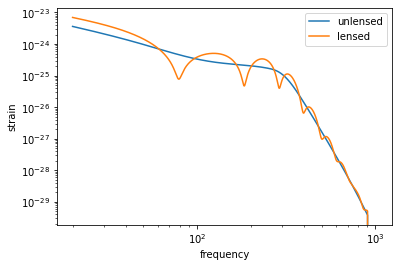

In [54]:
import matplotlib.pyplot as plt

plt.loglog(freqs, abs(sH1), label="unlensed")
plt.loglog(freqs, abs(lensed_sH1), label="lensed")
plt.legend(loc=0)
plt.ylabel("strain")
plt.xlabel("frequency")

In [55]:
import numpy.fft
numpy.fft.irfft(sH1)

array([-1.25158854e-28, -1.25107203e-28, -1.25053279e-28, ...,
       -1.25318044e-28, -1.25264831e-28, -1.25212730e-28])

In [56]:
sH1_fft = np.concatenate((np.zeros(160), sH1), axis=None)
lensed_sH1_fft = np.concatenate((np.zeros(160), lensed_sH1), axis=None)
ts = numpy.fft.irfft(sH1_fft)
ts_lensed = numpy.fft.irfft(lensed_sH1_fft)

In [57]:
len(sH1_fft)

8193

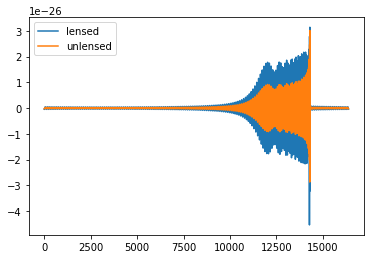

In [58]:

plt.plot(ts_lensed, label="lensed")
plt.plot(ts, label="unlensed")
plt.legend(loc=0)

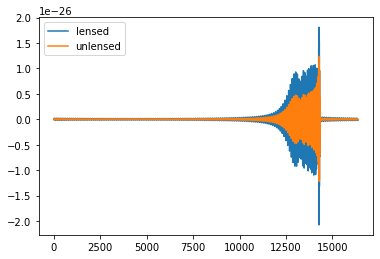

In [37]:

plt.plot(ts_lensed, label="lensed")
plt.plot(ts, label="unlensed")
plt.legend(loc=0)

In [9]:
len(ts)

16064